# POWER GRID FORECASTING (Time Series Regression)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('power_grid_corp_power_demand.csv')

In [7]:
df.head(10)

,datetime,generation_mw,demand_mw,load_shedding,gas,liquid_fuel,coal,hydro,solar,wind,india_bheramara_hvdc,india_tripura,india_adani,nepal
0,2015-04-19 22:00:00,6323.0,6323,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
1,2015-04-19 21:00:00,6667.0,6667,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2,2015-04-19 19:00:00,6897.0,6897,0,4415,1836,161,41,NaN,NaN,444,0,NaN,NaN
3,2015-04-19 18:30:00,6933.0,6933,0,4423,1862,159,45,NaN,NaN,444,0,NaN,NaN
4,2015-04-19 18:00:00,6874.0,6874,0,4319,1892,155,65,NaN,NaN,443,0,NaN,NaN
5,2015-04-19 17:30:00,6299.0,6299,0,4056,1602,156,42,NaN,NaN,443,0,NaN,NaN
6,2015-04-19 17:00:00,5725.0,5725,0,3892,1190,158,42,NaN,NaN,443,0,NaN,NaN
7,2015-04-19 16:00:00,5604.0,5604,0,3895,1065,160,40,NaN,NaN,444,0,NaN,NaN
8,2015-04-19 15:00:00,5651.0,5651,0,3942,1064,161,40,NaN,NaN,444,0,NaN,NaN
9,2015-04-19 14:00:00,5692.0,5692,0,3973,1074,162,40,NaN,NaN,443,0,NaN,NaN


In [8]:
df.tail(10)

,datetime,generation_mw,demand_mw,load_shedding,gas,liquid_fuel,coal,hydro,solar,wind,india_bheramara_hvdc,india_tripura,india_adani,nepal
92208,2025-06-17 09:00:00,12290.0,12290,0,6065,531,3491,132,203.0,16.0,924,24,866.0,38.0
92209,2025-06-17 08:00:00,11896.0,11896,0,5678,490,3470,132,219.0,57.0,924,24,864.0,38.0
92210,2025-06-17 07:00:00,11745.0,11745,0,5614,494,3487,132,128.0,28.0,924,26,874.0,38.0
92211,2025-06-17 06:00:00,11805.0,11805,0,5620,539,3485,132,79.0,47.0,924,34,907.0,38.0
92212,2025-06-17 05:00:00,12062.0,12062,0,5811,566,3535,172,21.0,42.0,924,32,921.0,38.0
92213,2025-06-17 04:00:00,12698.0,12698,0,6030,834,3610,172,0.0,42.0,924,38,1010.0,38.0
92214,2025-06-17 03:00:00,13280.0,13280,0,6347,999,3698,172,0.0,40.0,924,38,1024.0,38.0
92215,2025-06-17 02:00:00,13719.0,13719,0,6340,1196,3881,172,0.0,27.0,924,36,1105.0,38.0
92216,2025-06-17 01:00:00,14093.0,14115,21,6323,1350,4019,172,0.0,28.0,924,38,1201.0,38.0
92217,2025-06-17 00:00:00,14628.0,14650,21,6302,1672,4186,172,0.0,41.0,924,42,1251.0,38.0


In [18]:
df.shape

(92218, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92218 entries, 0 to 92217
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              92218 non-null  object 
 1   generation_mw         92218 non-null  float64
 2   demand_mw             92218 non-null  int64  
 3   load_shedding         92218 non-null  int64  
 4   gas                   92218 non-null  int64  
 5   liquid_fuel           92218 non-null  int64  
 6   coal                  92218 non-null  int64  
 7   hydro                 92218 non-null  int64  
 8   solar                 70330 non-null  float64
 9   wind                  18656 non-null  float64
 10  india_bheramara_hvdc  92218 non-null  int64  
 11  india_tripura         92218 non-null  int64  
 12  india_adani           7332 non-null   float64
 13  nepal                 5347 non-null   float64
dtypes: float64(5), int64(8), object(1)
memory usage: 9.9+ MB


In [16]:
df.isnull().sum()

datetime                    0
generation_mw               0
demand_mw                   0
load_shedding               0
gas                         0
liquid_fuel                 0
coal                        0
hydro                       0
solar                   21888
wind                    73562
india_bheramara_hvdc        0
india_tripura               0
india_adani             84886
nepal                   86871
dtype: int64

In [9]:
df.describe()

,generation_mw,demand_mw,load_shedding,gas,liquid_fuel,coal,hydro,solar,wind,india_bheramara_hvdc,india_tripura,india_adani,nepal
count,9.221800e+04,92218.000000,92218.000000,92218.000000,9.221800e+04,92218.000000,92218.000000,70330.000000,18656.000000,92218.000000,92218.000000,7332.000000,5347.000000
mean,9.438897e+03,8826.103689,81.656434,5122.690592,2.040452e+03,976.933375,96.880186,46.299085,9.235099,663.823614,93.703605,881.279187,0.547223
std,2.124718e+05,2771.993838,443.490152,1139.692130,9.630580e+04,1227.773474,71.469727,106.493950,16.278126,350.004186,47.373638,369.930053,4.527565
min,7.300000e+01,6.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.821000e+03,6819.250000,0.000000,4421.000000,7.210000e+02,159.000000,40.000000,0.000000,0.000000,466.000000,70.000000,702.000000,0.000000
50%,8.419750e+03,8431.000000,0.000000,5025.000000,1.536000e+03,404.500000,79.000000,0.000000,4.000000,706.000000,98.000000,822.000000,0.000000
75%,1.056400e+04,10638.000000,0.000000,5814.000000,2.463000e+03,1230.000000,150.000000,25.000000,13.000000,910.000000,126.000000,1051.500000,0.000000
max,6.452650e+07,156050.000000,65359.000000,74818.000000,2.922290e+07,31687.000000,5623.000000,2998.000000,922.000000,76292.000000,1565.000000,12665.000000,38.000000


### Visualizing Missing Values

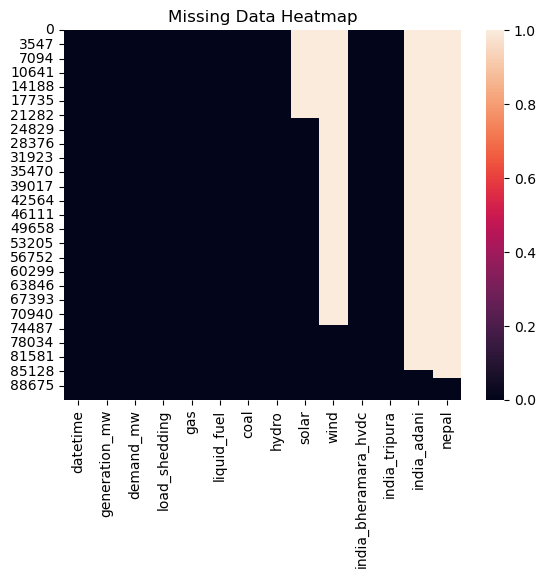

In [20]:
sns.heatmap(df.isnull())
plt.title('Missing Data Heatmap')
plt.show()

#### Bright gaps shows where the missing values are in the specific columns.

### Convert Datetime and Set Index

In [21]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [22]:
df.head()

,generation_mw,demand_mw,load_shedding,gas,liquid_fuel,coal,hydro,solar,wind,india_bheramara_hvdc,india_tripura,india_adani,nepal
datetime,,,,,,,,,,,,,
2015-04-19 22:00:00,6323.0,6323,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2015-04-19 21:00:00,6667.0,6667,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN
2015-04-19 19:00:00,6897.0,6897,0,4415,1836,161,41,NaN,NaN,444,0,NaN,NaN
2015-04-19 18:30:00,6933.0,6933,0,4423,1862,159,45,NaN,NaN,444,0,NaN,NaN
2015-04-19 18:00:00,6874.0,6874,0,4319,1892,155,65,NaN,NaN,443,0,NaN,NaN


In [23]:
df.tail()

,generation_mw,demand_mw,load_shedding,gas,liquid_fuel,coal,hydro,solar,wind,india_bheramara_hvdc,india_tripura,india_adani,nepal
datetime,,,,,,,,,,,,,
2025-06-17 04:00:00,12698.0,12698,0,6030,834,3610,172,0.0,42.0,924,38,1010.0,38.0
2025-06-17 03:00:00,13280.0,13280,0,6347,999,3698,172,0.0,40.0,924,38,1024.0,38.0
2025-06-17 02:00:00,13719.0,13719,0,6340,1196,3881,172,0.0,27.0,924,36,1105.0,38.0
2025-06-17 01:00:00,14093.0,14115,21,6323,1350,4019,172,0.0,28.0,924,38,1201.0,38.0
2025-06-17 00:00:00,14628.0,14650,21,6302,1672,4186,172,0.0,41.0,924,42,1251.0,38.0


### Plot the Target Variable

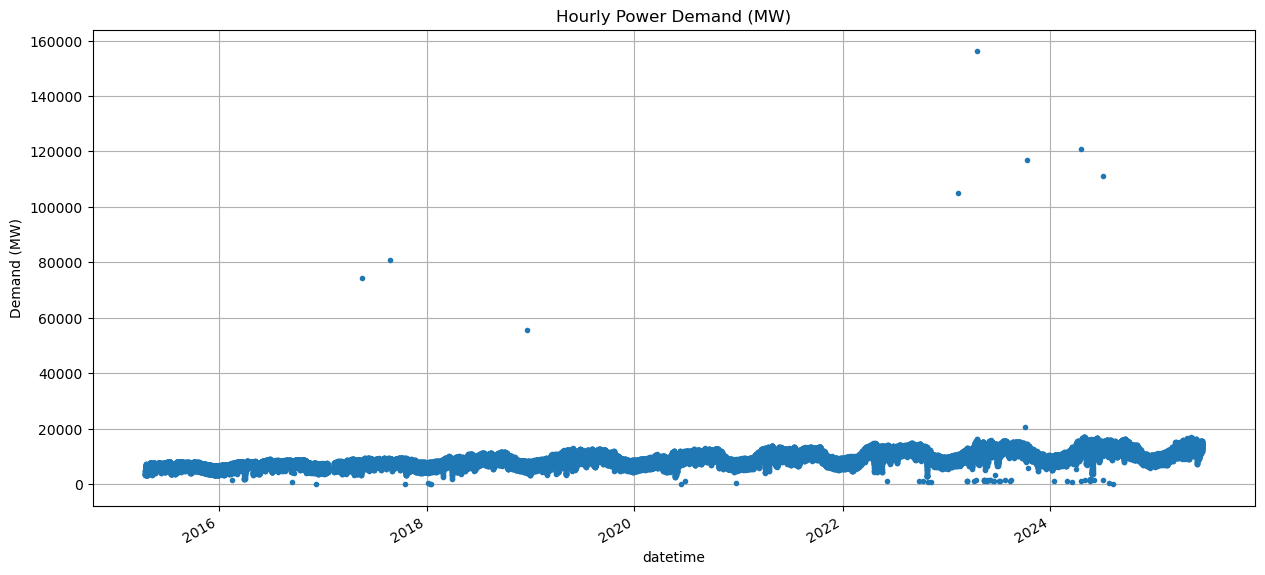

In [41]:
df['demand_mw'].plot(
    figsize=(15, 7),
    title='Hourly Power Demand (MW)',
    grid="true",
    style='.', # Using dots instead of a line to see individual points
    ms=6 # dot size 
)
plt.ylabel('Demand (MW)')
plt.show()

#### The extreme points seen above the normal distribution band are outliers.
#### The safe threshold apperas to be aroung 25000 MV, let us check how many datapoints are above them.

In [33]:
# to check the number of datapoints above the choosen threshold.
outlier_count = df[df['demand_mw'] > 25000].shape[0]
print(f"Outlier count: {outlier_count}")

Outlier count: 8


In [34]:
df_cleaned = df[df['demand_mw'] < 25000].copy()

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")

Original shape: (92218, 13)
Shape after removing outliers: (92210, 13)


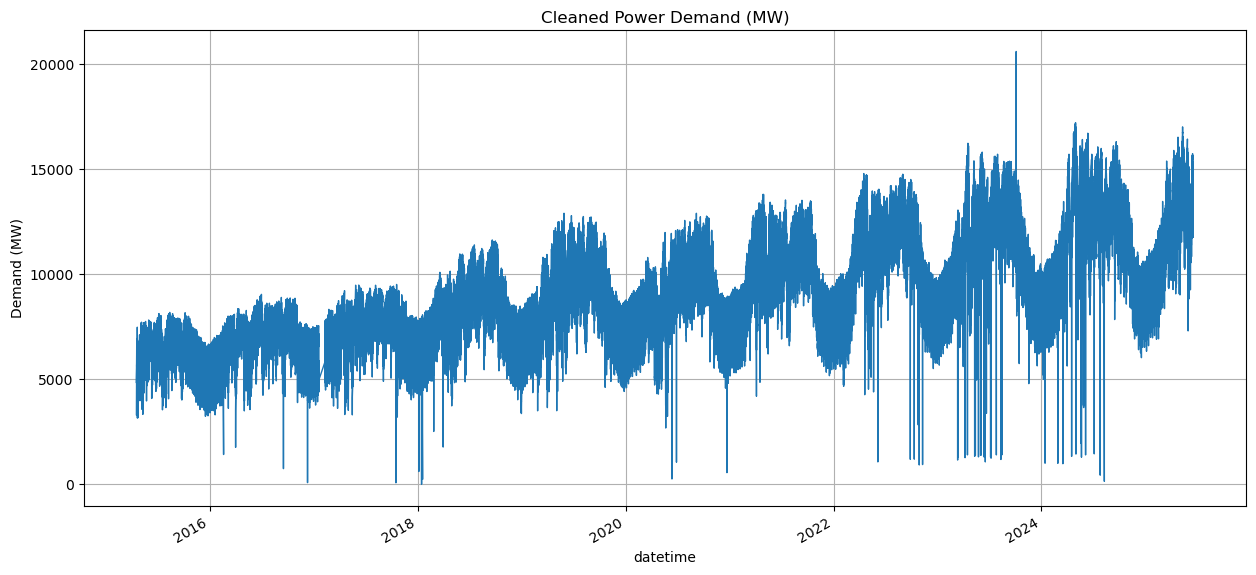

In [39]:
# replot the same graph
df_cleaned['demand_mw'].plot(
    figsize=(15, 7), 
    grid='true',
    title='Cleaned Power Demand (MW)', 
    lw=1)
plt.ylabel('Demand (MW)')
plt.show()

#### Clean Upward Trend - Long term growth in electricity demand. A simple feature like "year" will be useful.
#### Strong Yearly Seasonality - Wave like pattern. It peaks in the middle of the year everytime. Those are the summer months telling us that the demand of electricity supplies increases during summer times. Features like month and day_of_year will be crucial for the model to capture this.
#### Mean/ Variance - Mean and Variance keeps on increasing every year i.e. the trend plus the season multiplies.
#### So, we can say that this is a multiplicative time series model.

### Analyze Daily & Weekly Seasonality

In [42]:
# creating columns for hour, day of week, month, etc from the index
df_cleaned['hour'] = df_cleaned.index.hour
df_cleaned['dayofweek'] = df_cleaned.index.dayofweek # Monday=0, Sunday=6
df_cleaned['month'] = df_cleaned.index.month
df_cleaned['year'] = df_cleaned.index.year
df_cleaned['dayofyear'] = df_cleaned.index.dayofyear
df_cleaned['weekofyear'] = df_cleaned.index.isocalendar().week.astype(int)

In [44]:
df_cleaned[['hour', 'dayofweek', 'month', 'year']].head()

,hour,dayofweek,month,year
datetime,,,,
2015-04-19 22:00:00,22,6,4,2015
2015-04-19 21:00:00,21,6,4,2015
2015-04-19 19:00:00,19,6,4,2015
2015-04-19 18:30:00,18,6,4,2015
2015-04-19 18:00:00,18,6,4,2015


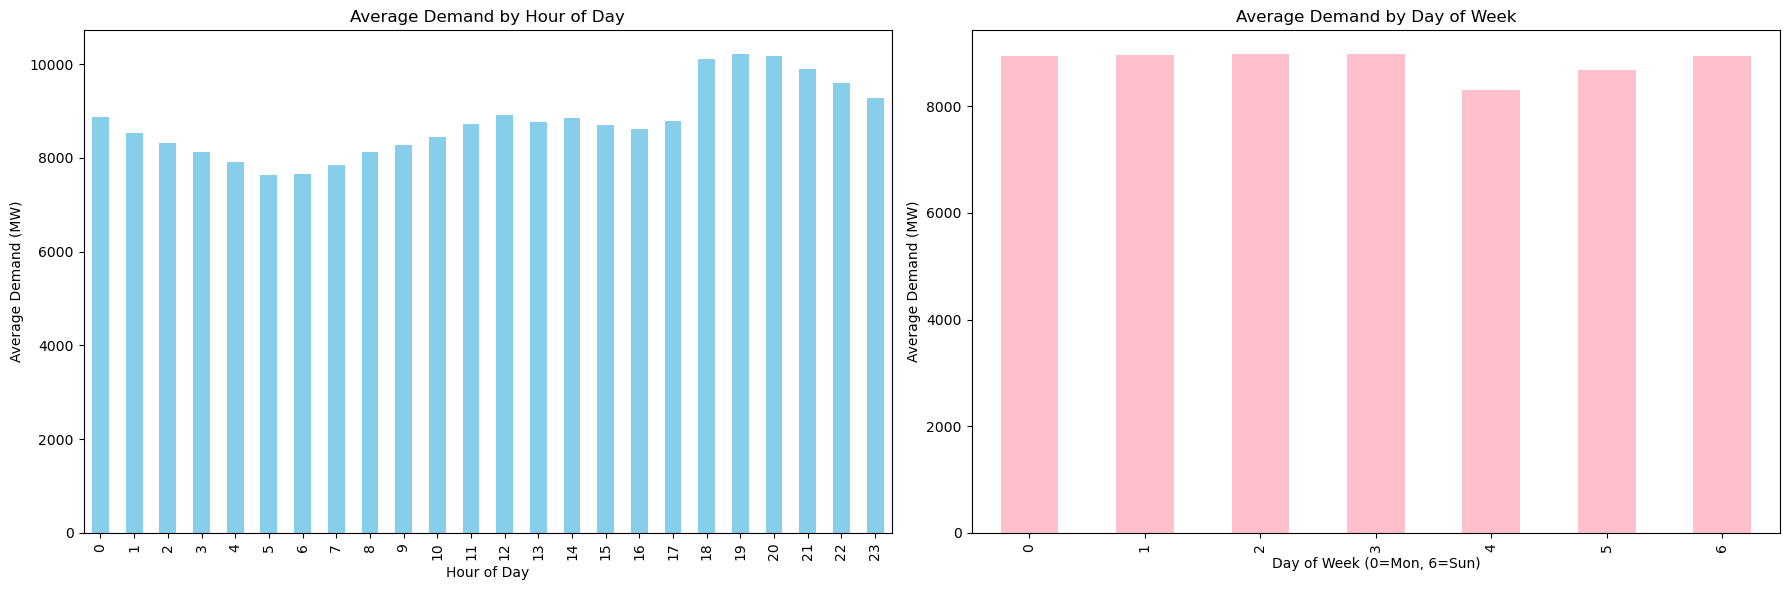

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting average demand by hour
df_cleaned.groupby('hour')['demand_mw'].mean().plot(
    ax=ax[0],
    title='Average Demand by Hour of Day',
    kind='bar',
    color='skyblue'
)
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Average Demand (MW)')


# Plotting average demand by day of week
df_cleaned.groupby('dayofweek')['demand_mw'].mean().plot(
    ax=ax[1],
    title='Average Demand by Day of Week',
    kind='bar',
    color='pink'
)
ax[1].set_xlabel('Day of Week (0=Mon, 6=Sun)')
ax[1].set_ylabel('Average Demand (MW)')

plt.tight_layout()
plt.show()

#### Average Demand by Hour of Day
#### 1. Demand is lowest in early morning (most people are asleep)
#### 2. Demand rises as people wake up.
#### 3. At night, demand peaks the most.

#### Average Demand by Day of Week
#### 1. Stable weekdays.
#### 2. Friday dip: many reasons like industrial shutting early, etc.
#### 3. Saturday: Low avg demand, may be due to most commercial and industrial activity being paused.
#### 4. Sunday rise, but still lowet than weekdays: People are home, using residential power, but the large-scale industrial load is still off.

### Correlation matrix for cleaned dataframe

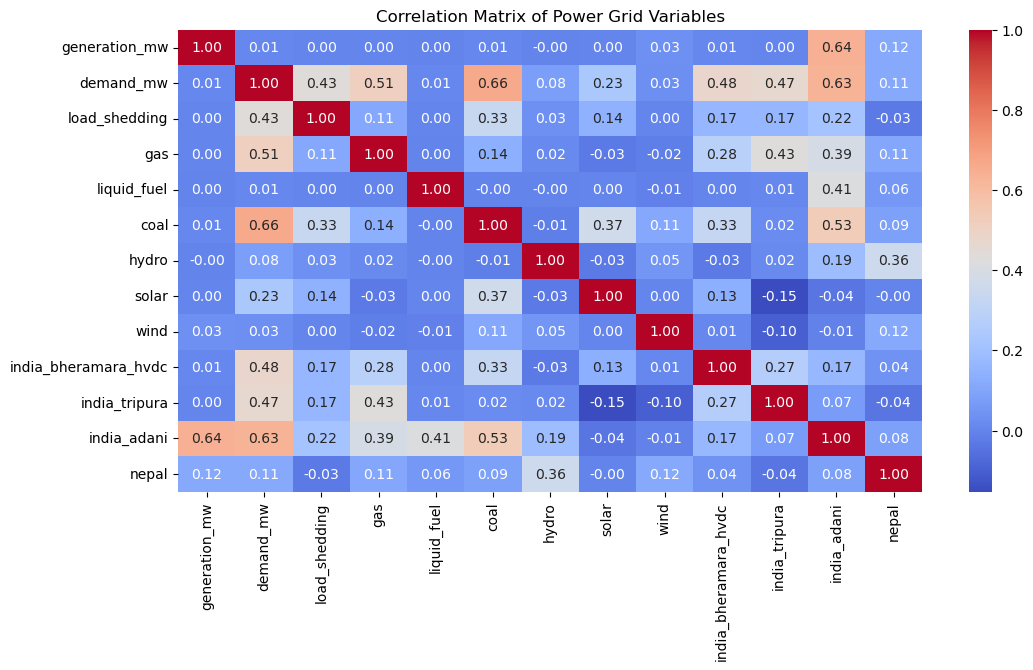

In [53]:
cols_for_corr = [
    'generation_mw', 'demand_mw', 'load_shedding', 'gas', 'liquid_fuel',
    'coal', 'hydro', 'solar', 'wind', 'india_bheramara_hvdc',
    'india_tripura', 'india_adani', 'nepal'
]
correlation_matrix = df_cleaned[cols_for_corr].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm', 
    fmt=".2f"       
)
plt.title('Correlation Matrix of Power Grid Variables')
plt.show()

#### Observations:
#### Strongest Drivers - coal, india_adani, gas
#### Weak Drivers - solar, hydro, wind

### Boxplots

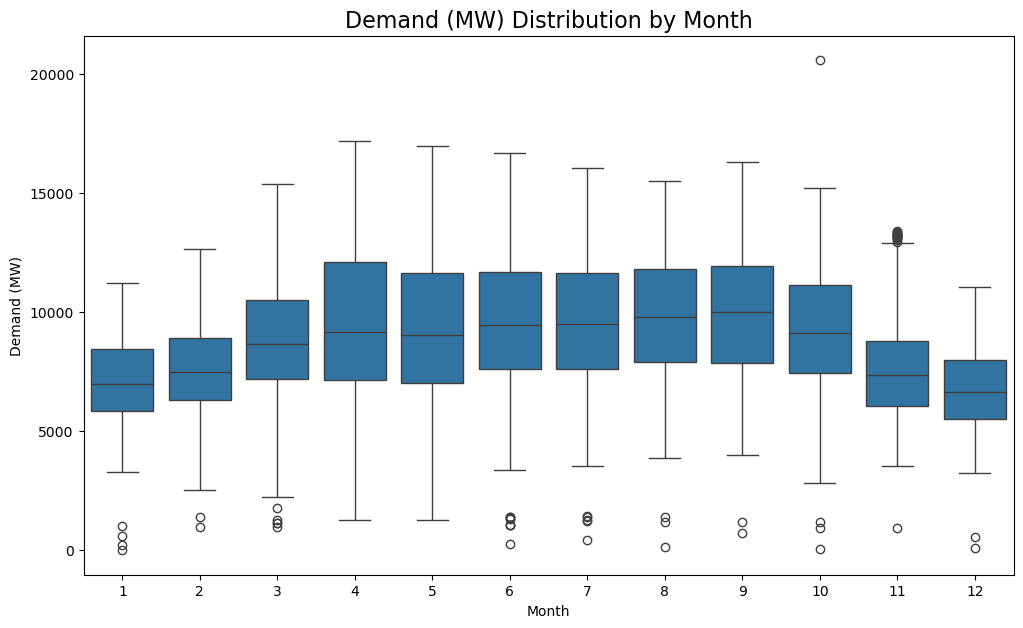

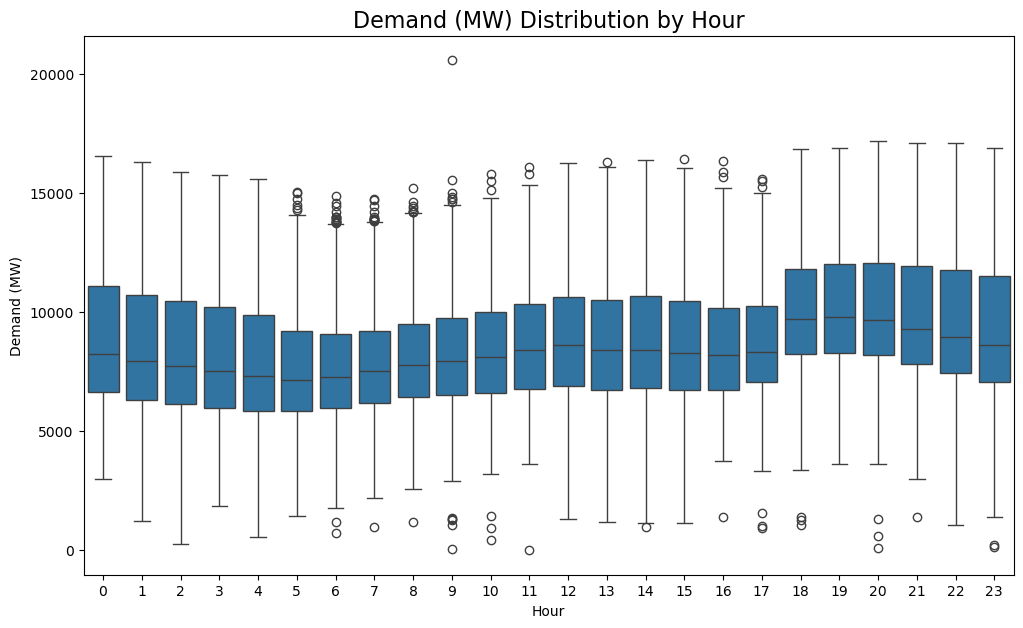

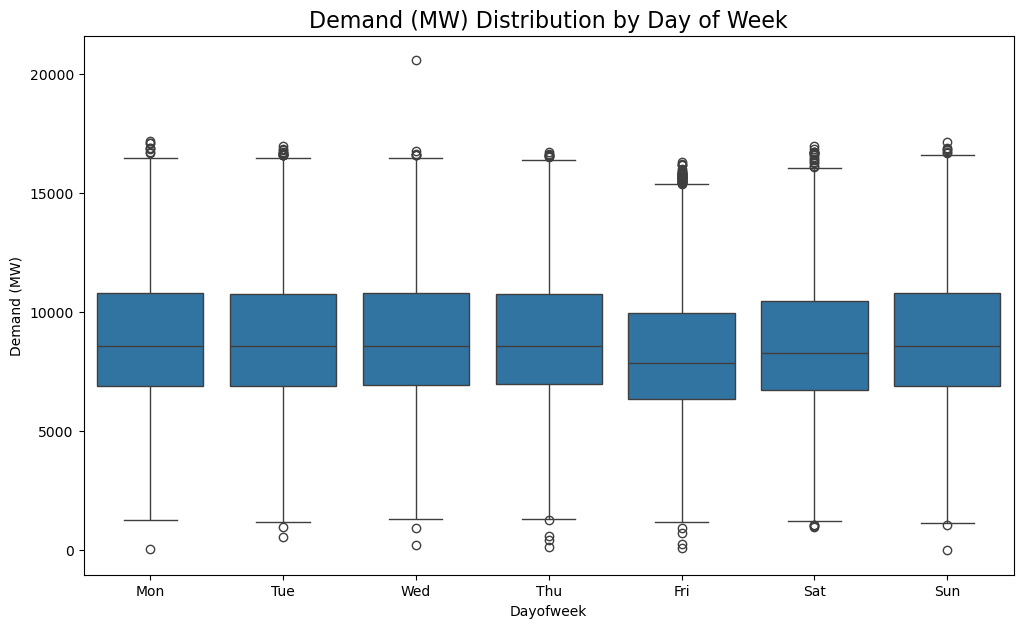

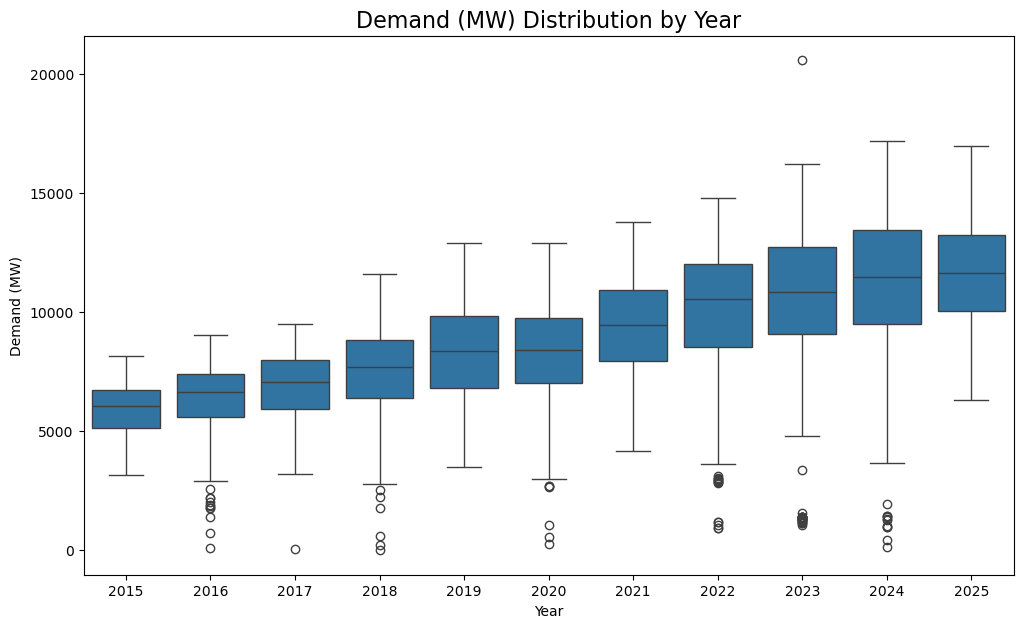

In [58]:
boxplot_features = ['month', 'hour', 'dayofweek', 'year']

# Loop through each feature and create a separate plot
for feature in boxplot_features:
    plt.figure(figsize=(12, 7)) # Create a new figure for each plot
    sns.boxplot(data=df_cleaned, x=feature, y='demand_mw')
    
    title = f'Demand (MW) Distribution by {feature.capitalize()}'
    if feature == 'dayofweek':
        plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        title = 'Demand (MW) Distribution by Day of Week'

    plt.title(title, fontsize=16)
    plt.xlabel(feature.capitalize())
    plt.ylabel('Demand (MW)')
    plt.show()

#### 1. Demand by Month
##### Summer Peak: Demand is highest and most variable from April to September, peaking around April/May.
##### Winter Low: Demand is lowest and most stable in the winter months (November, December, January).

#### 2. Demand by Hour
##### Evening Peak: The highest and most spread-out demand occurs in the evening, from 6 PM to 10 PM.
##### Overnight Low: Demand is lowest and most consistent in the early morning, between 3 AM and 5 AM.

#### 3. Demand by Day of Week
##### Weekend Dip: Demand is noticeably lower on Fridays and Saturdays compared to the rest of the week.
##### Weekday Stability: Monday to Thursday show very similar high demand distributions. Sunday is slightly lower than weekdays.
    
#### 4. Demand by Year 
##### Clear Upward Trend: The median demand (the line in the box) clearly increases every year.
##### Increasing Variance: The boxes get taller and the whiskers get longer in later years, confirming that demand is becoming more variable over time.

### Scatterplots

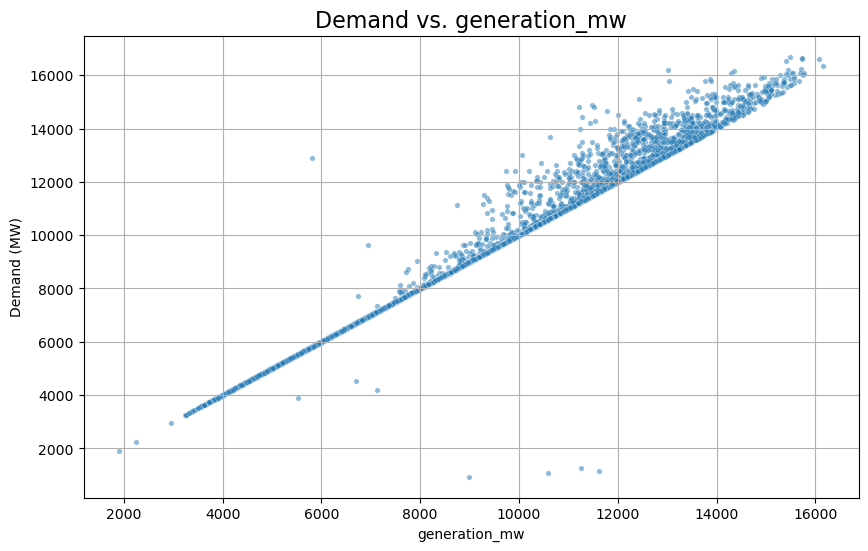

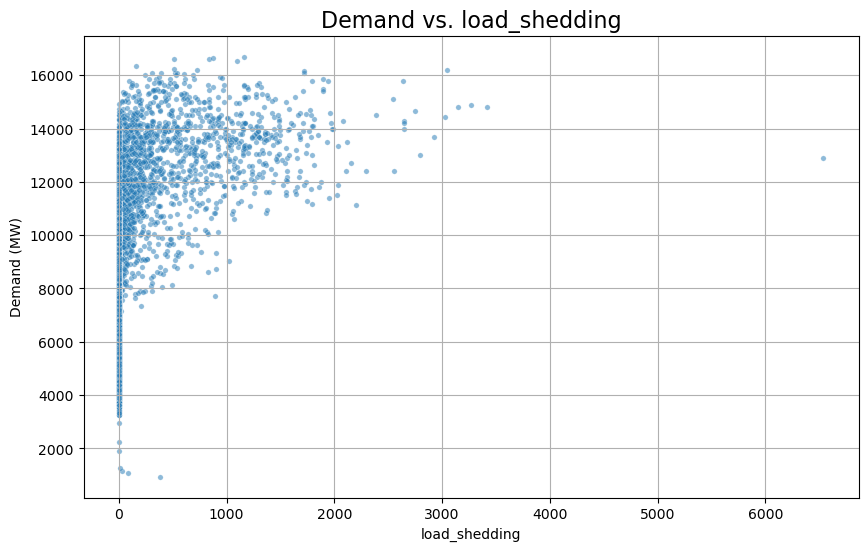

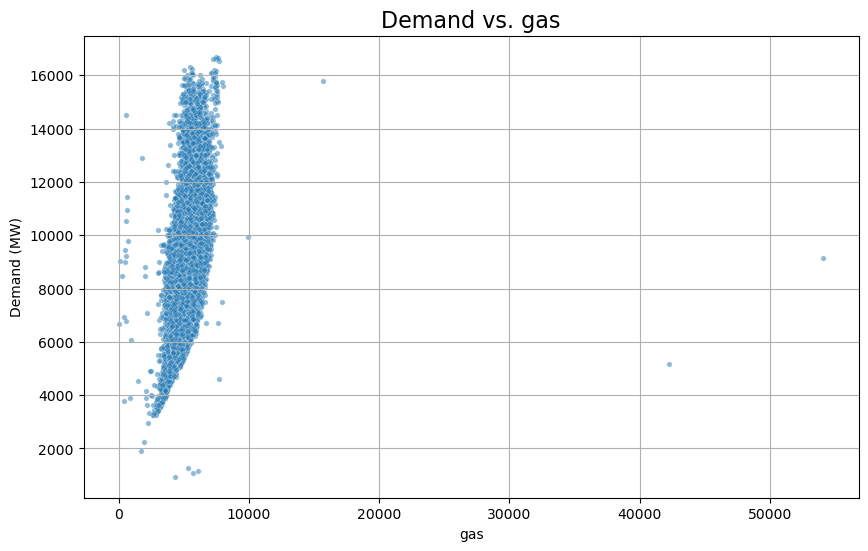

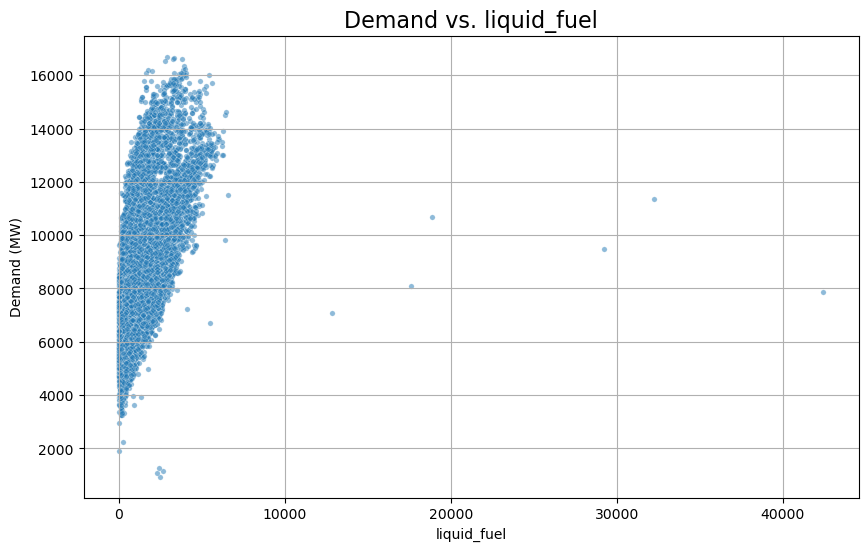

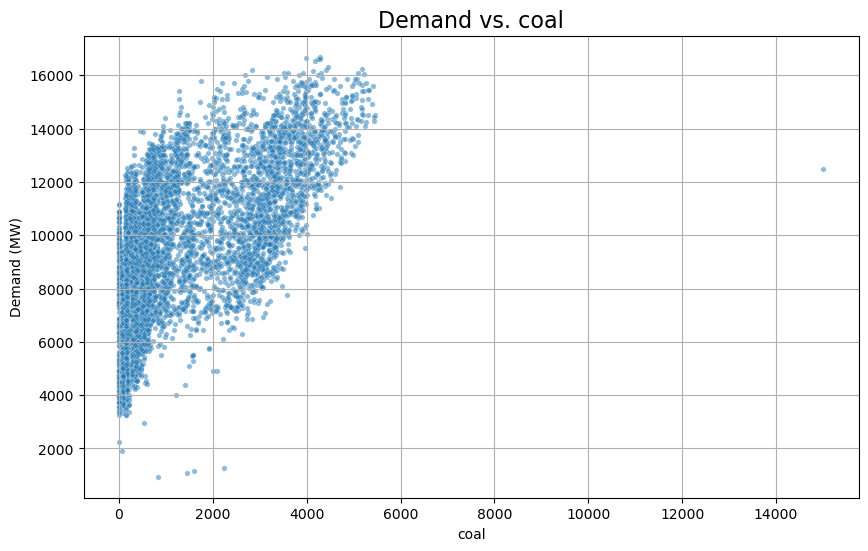

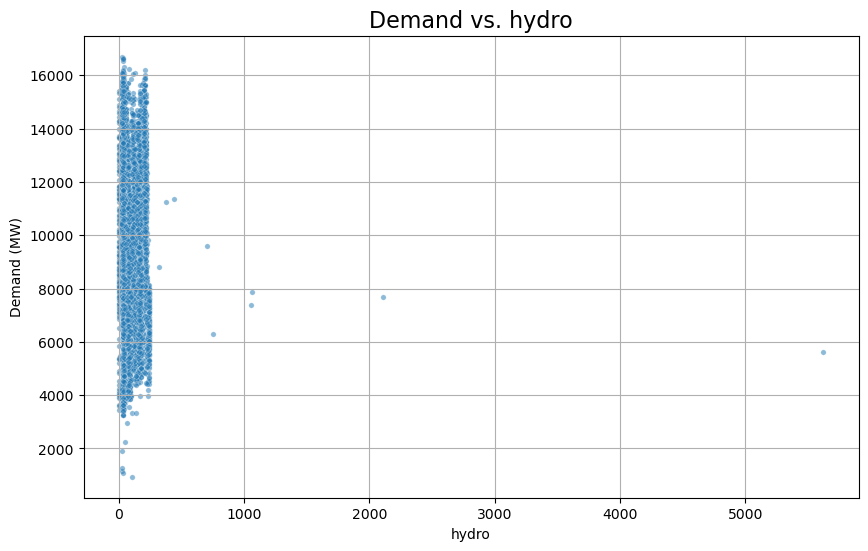

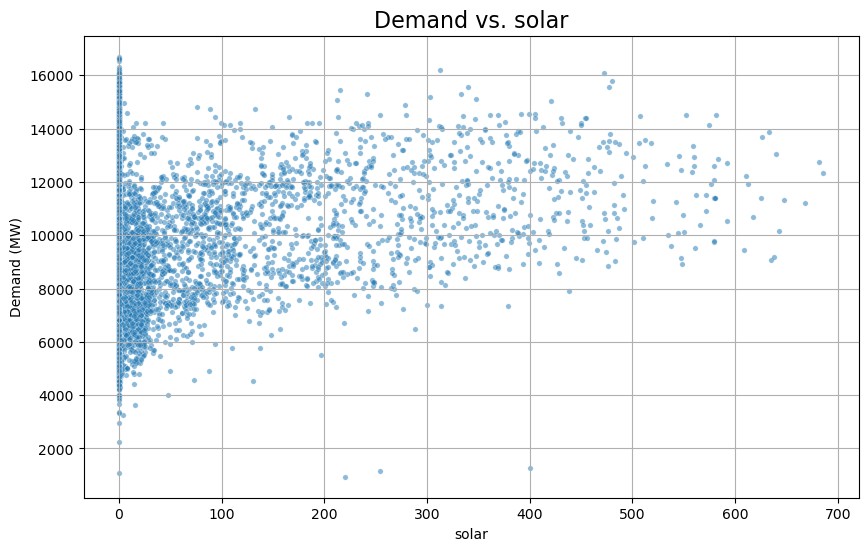

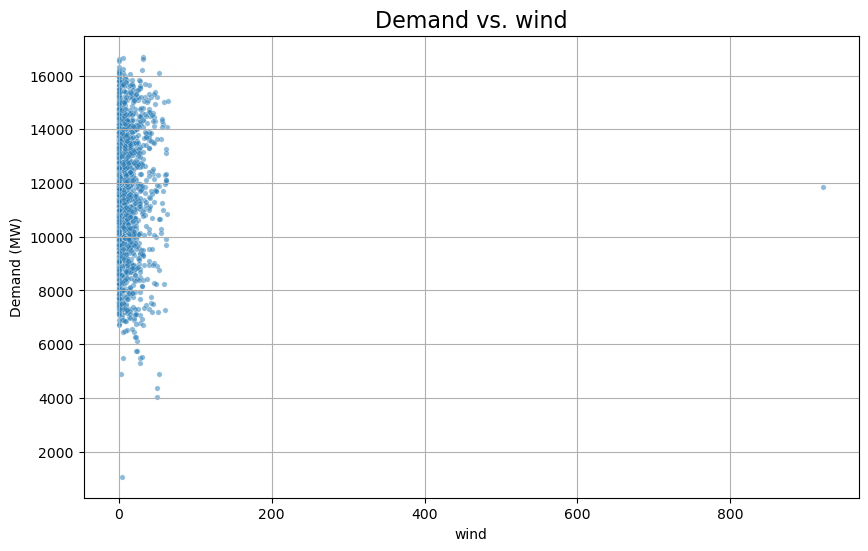

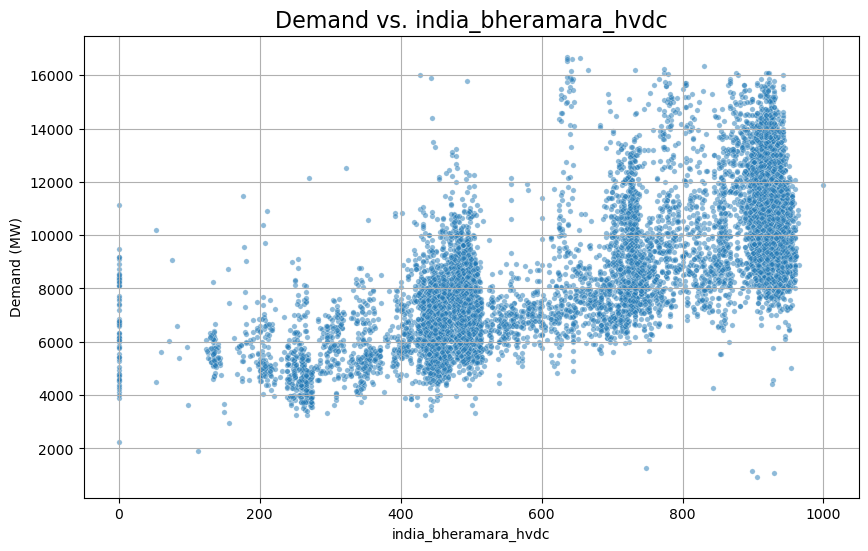

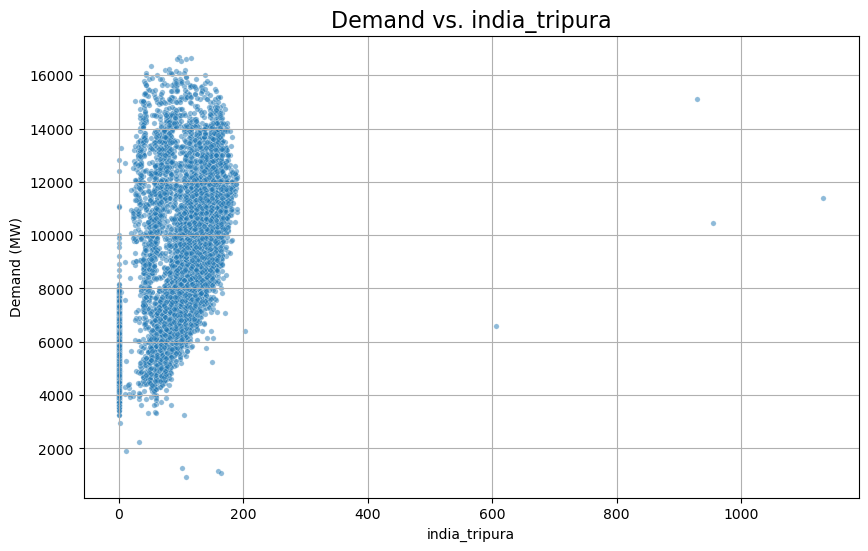

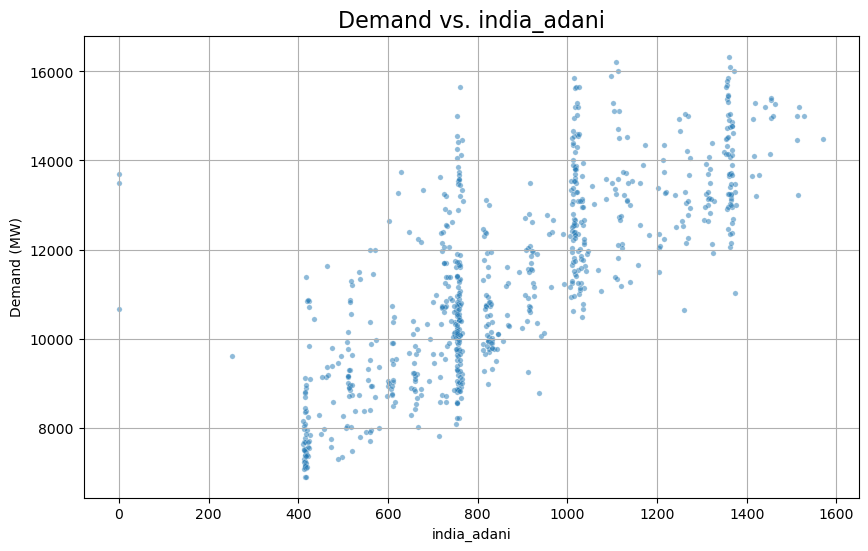

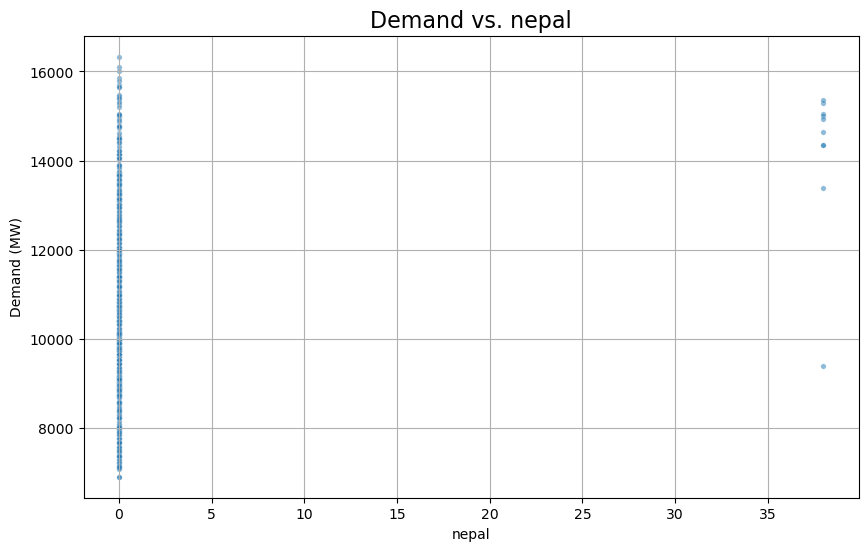

In [59]:
scatter_features = [
    'generation_mw', 'load_shedding', 'gas', 'liquid_fuel', 'coal',
    'hydro', 'solar', 'wind', 'india_bheramara_hvdc', 'india_tripura',
    'india_adani', 'nepal'
]

df_sample = df_cleaned.sample(n=10000, random_state=42)

for feature in scatter_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_sample,
        x=feature,
        y='demand_mw',
        alpha=0.5,
        s=15
    )
    plt.title(f'Demand vs. {feature}', fontsize=16)
    plt.xlabel(feature)
    plt.ylabel('Demand (MW)')
    plt.grid(True)
    plt.show()

### Decomposition

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(
    df_cleaned['demand_mw'],
    model='multiplicative', #multiplicative model because variance is growing with the trend.
    period=24 
)

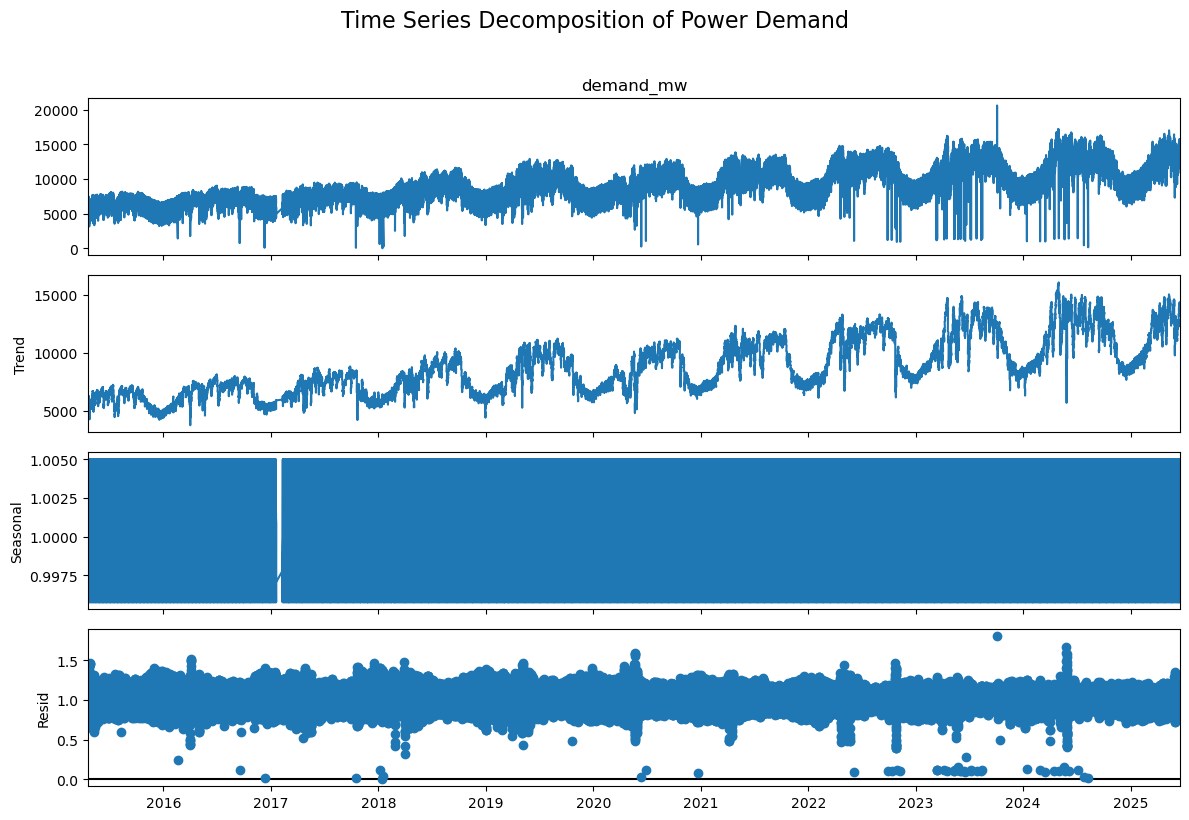

In [65]:
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Time Series Decomposition of Power Demand', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### Observation:
##### Trend - Increasing overtime
##### Seasonal - Thick blue filled in line because of data over years (lets zoom in a bit to 3 days to see what's happening)
##### Residual - Residual

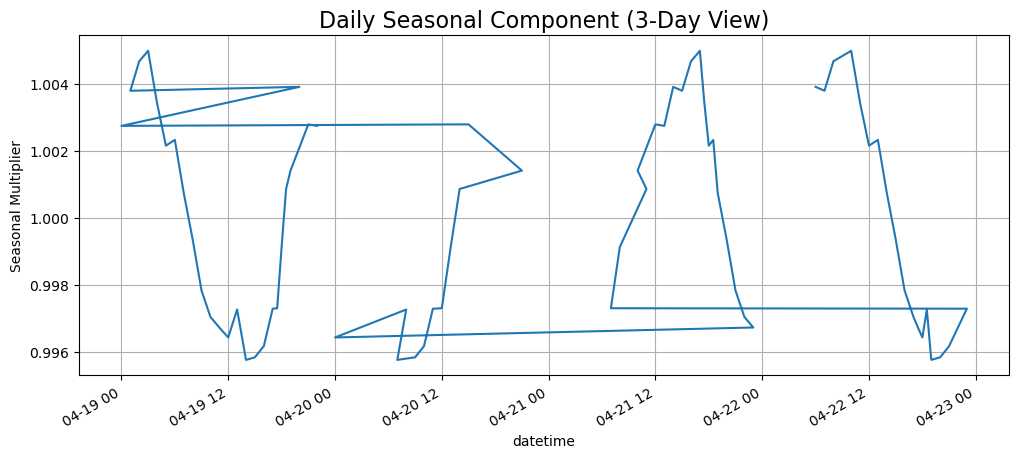

In [66]:
plt.figure(figsize=(12, 5))
result.seasonal.head(24 * 3).plot() # 3 days
plt.title('Daily Seasonal Component (3-Day View)', fontsize=16)
plt.ylabel('Seasonal Multiplier')
plt.grid(True)
plt.show()

#### Observation: The plot is messy but it successfully shows the daily pattern that is demand is lowest overnight (multiplier < 1.0), rises during the day, and peaks in the evening (multiplier > 1.0)

### Stationarity Test

#### Augmented Dickey-Fuller (ADF) test

In [69]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_cleaned['demand_mw'])

print('ADF Test Results')
print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.4f}')

if result[1] <= 0.05:
    print("\nConclusion: The p-value is very small, hence the data is stationary.")
else:
    print("\nConclusion: The p-value is large, hence the data is non-stationary.")


ADF Test Results
ADF Statistic: -6.8483
p-value: 0.0000
Critical Values:
	1%: -3.4304
	5%: -2.8616
	10%: -2.5668

Conclusion: The p-value is very small, suggesting the data is stationary.


In [70]:
from statsmodels.tsa.stattools import kpss

result = kpss(df_cleaned['demand_mw'], regression='c', nlags="auto")

print('KPSS Test Results')
print(f'KPSS Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')
print('Critical Values:')
for key, value in result[3].items():
    print(f'\t{key}: {value:.4f}')

if result[1] <= 0.05:
    print("\nConclusion: The p-value is small, so we reject the null hypothesis. The data is non-stationary.")
else:
    print("\nConclusion: The p-value is large, so we cannot reject the null hypothesis. The data is stationary.")



KPSS Test Results
KPSS Statistic: 33.7212
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

Conclusion: The p-value is small, so we reject the null hypothesis. The data is non-stationary.


C:\Users\Navdeep\AppData\Local\Temp\ipykernel_6740\2955037793.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df_cleaned['demand_mw'], regression='c', nlags="auto")


#### Observation:
##### The test was essentially fooled by the very strong and consistent daily cycle in the data. It saw the demand reliably going up and down every 24 hours and mistook that powerful, repeating pattern for overall stability.
##### This strong daily pattern was so dominant that it basically "drowned out" the slower, long-term growth trend. The test focused so much on the daily repetition that it failed to see the bigger picture of the data trending upwards over the years.

### Feature Engineering

#### Deriving Time based features (Already done)

In [83]:
# Filling missing solar values with 0.

df_cleaned['solar'].fillna(0, inplace=True)

# Creating feature
# This gives the model the average solar generation over the past 24 hours
df_cleaned['rolling_mean_solar_24h'] = df_cleaned['solar'].shift(1).rolling(window=24).mean()

df_cleaned.head(10)

,generation_mw,demand_mw,load_shedding,gas,liquid_fuel,coal,hydro,solar,india_bheramara_hvdc,india_tripura,hour,dayofweek,month,year,dayofyear,weekofyear,rolling_mean_solar_24h
datetime,,,,,,,,,,,,,,,,,
2015-04-19 22:00:00,6323.0,6323,0,0,0,0,0,0.0,0,0,22,6,4,2015,109,16,NaN
2015-04-19 21:00:00,6667.0,6667,0,0,0,0,0,0.0,0,0,21,6,4,2015,109,16,NaN
2015-04-19 19:00:00,6897.0,6897,0,4415,1836,161,41,0.0,444,0,19,6,4,2015,109,16,NaN
2015-04-19 18:30:00,6933.0,6933,0,4423,1862,159,45,0.0,444,0,18,6,4,2015,109,16,NaN
2015-04-19 18:00:00,6874.0,6874,0,4319,1892,155,65,0.0,443,0,18,6,4,2015,109,16,NaN
2015-04-19 17:30:00,6299.0,6299,0,4056,1602,156,42,0.0,443,0,17,6,4,2015,109,16,NaN
2015-04-19 17:00:00,5725.0,5725,0,3892,1190,158,42,0.0,443,0,17,6,4,2015,109,16,NaN
2015-04-19 16:00:00,5604.0,5604,0,3895,1065,160,40,0.0,444,0,16,6,4,2015,109,16,NaN
2015-04-19 15:00:00,5651.0,5651,0,3942,1064,161,40,0.0,444,0,15,6,4,2015,109,16,NaN


#### First, I added the basics. I gave the model features like the hour, day of the week, and month. Demand is all about routines and seasons, so the model needs to understand time.
#### Then, I had to be careful. My analysis showed that coal usage was super connected to demand. But that's a trap. You only burn more coal because demand is already high. Using it would be like cheating the model would look smart, but it couldn't actually predict the future. So I threw that out.
#### So, I picked a smarter feature: solar. I used past solar generation as a simple proxy for weather. It tells the model if it was sunny recently, which affects things like A/C use. It's a real predictive clue, not a "cheat sheet" item like coal.

### Handling Missing Values

In [80]:
# The columns you want to remove
columns_to_drop = [
    'wind',
    'india_adani',
    'nepal'
]

df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(f"Successfully dropped: {', '.join(columns_to_drop)}")

df_cleaned.head()

Successfully dropped: wind, india_adani, nepal


,generation_mw,demand_mw,load_shedding,gas,liquid_fuel,coal,hydro,solar,india_bheramara_hvdc,india_tripura,hour,dayofweek,month,year,dayofyear,weekofyear,rolling_mean_solar_24h
datetime,,,,,,,,,,,,,,,,,
2015-04-19 22:00:00,6323.0,6323,0,0,0,0,0,0.0,0,0,22,6,4,2015,109,16,NaN
2015-04-19 21:00:00,6667.0,6667,0,0,0,0,0,0.0,0,0,21,6,4,2015,109,16,NaN
2015-04-19 19:00:00,6897.0,6897,0,4415,1836,161,41,0.0,444,0,19,6,4,2015,109,16,NaN
2015-04-19 18:30:00,6933.0,6933,0,4423,1862,159,45,0.0,444,0,18,6,4,2015,109,16,NaN
2015-04-19 18:00:00,6874.0,6874,0,4319,1892,155,65,0.0,443,0,18,6,4,2015,109,16,NaN


In [84]:
print(f"Number of rows before dropping NaNs: {len(df_cleaned)}")

df_cleaned.dropna(inplace=True)

print(f"Number of rows after dropping NaNs: {len(df_cleaned)}")

Number of rows before dropping NaNs: 92210
Number of rows after dropping NaNs: 92186


#### Why I Dropped the wind, india_adani, and nepal Columns:

##### india_adani (The "Cheater" Column): This was dropped to prevent data leakage. Power is imported from Adani because demand is high. Using it to predict demand is like using the answer to solve the problem. It would create a useless model that couldn't forecast the future.
##### wind (The "Noisy" Column): This was dropped because it was mostly noise. It had a ton of missing data and the heatmap showed it had almost no relationship to our demand target. It would only confuse the model.
##### nepal (The "Not Useful" Column): Similar to wind, this column just wasn't useful. Its correlation with demand was very low, so it didn't provide enough of a signal to be worth keeping.

In [85]:
df_cleaned.isnull().sum()

generation_mw             0
demand_mw                 0
load_shedding             0
gas                       0
liquid_fuel               0
coal                      0
hydro                     0
solar                     0
india_bheramara_hvdc      0
india_tripura             0
hour                      0
dayofweek                 0
month                     0
year                      0
dayofyear                 0
weekofyear                0
rolling_mean_solar_24h    0
dtype: int64

#### Why I Dropped the First 24 Rows with Missing Solar Data:

##### Our new solar feature calculates the average solar power over the previous 24 hours.
##### For the first 24 hours in the dataset, there isn't a full 24-hour history to look back on, which is why the values are missing.
##### The cleanest and most standard solution is to simply remove these few rows from the very beginning of the dataset. Since we have thousands of data points, losing 24 has no impact.

#### Why I Did This Cleaning Before the Train-Test Split:

##### All these cleaning steps are universal rules that don't "learn" from the data. Dropping a column or filling a value with zero is a fixed decision.
##### By doing this before the split, I ensure that my training and testing datasets are perfectly consistent and have the exact same structure. It’s simpler and prevents any errors or data mismatches down the line.

### Train/Test Split

In [87]:
years_present = sorted(df_cleaned.index.year.unique())
print(years_present)

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [91]:
# 8 years for training, 3 for testing
train_cutoff_date = '2023-01-01'

# traning - before 2023.
train = df_cleaned.loc[df_cleaned.index < train_cutoff_date]

# test - from 2023 onwards.
test = df_cleaned.loc[df_cleaned.index >= train_cutoff_date]

train_percent = len(train) / len(df_cleaned) * 100
test_percent = len(test) / len(df_cleaned) * 100

print(f"The training set has {len(train):,} rows (~{train_percent:.0f}% of the data).")
print(f"The testing set has {len(test):,} rows (~{test_percent:.0f}% of the data).")

The training set has 69,767 rows (~76% of the data).
The testing set has 22,419 rows (~24% of the data).


### Model Training

### XG Boost

In [92]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

FEATURES = [col for col in df_cleaned.columns if col != 'demand_mw']
TARGET = 'demand_mw'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

reg = xgb.XGBRegressor(n_estimators=1000,
                       early_stopping_rounds=50,
                       learning_rate=0.01)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100) # 100 steps

[0]	validation_0-rmse:2151.97732	validation_1-rmse:3957.91817
[100]	validation_0-rmse:798.42752	validation_1-rmse:1661.48456
[200]	validation_0-rmse:310.56311	validation_1-rmse:876.18346
[300]	validation_0-rmse:148.34269	validation_1-rmse:657.90655
[400]	validation_0-rmse:105.81197	validation_1-rmse:610.36274
[500]	validation_0-rmse:95.80175	validation_1-rmse:596.63708
[600]	validation_0-rmse:86.05539	validation_1-rmse:586.74176
[700]	validation_0-rmse:78.23800	validation_1-rmse:582.89173
[800]	validation_0-rmse:70.22211	validation_1-rmse:582.24330
[900]	validation_0-rmse:66.21609	validation_1-rmse:581.70629


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

### Evaluate the model against the simple "naive" baseline

In [95]:
# Use our trained model to make predictions on the test set.
test['prediction'] = reg.predict(X_test)

# Create our simple "naive" baseline prediction.
full_data = pd.concat([train, test], sort=False)
test['naive_prediction'] = full_data['demand_mw'].shift(1)

# Step 3: Calculate the final scores.
# Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(test['demand_mw'], test['prediction'])

# We need to drop the first row for the naive prediction since it won't have a 'previous' value.
mae_naive = mean_absolute_error(test['demand_mw'].dropna(), test['naive_prediction'].dropna())

print("The Final Score")
print(f"Baseline 'Naive' Model's Average Error (MAE): {mae_naive:.2f} MW")
print(f"Our XGBoost Model's Average Error (MAE):      {mae_xgb:.2f} MW")

improvement = (mae_naive - mae_xgb) / mae_naive * 100

if mae_xgb < mae_naive:
    print(f"\nXGBoost model is {improvement:.1f}% more accurate than the simple guess.")
else:
    print(f"\nOur model didn't beat the baseline. This is a sign we need to improve our features or tune the model.")


The Final Score
Baseline 'Naive' Model's Average Error (MAE): 399.05 MW
Our XGBoost Model's Average Error (MAE):      187.20 MW

XGBoost model is 53.1% more accurate than the simple guess.


### Hyper parameter tuning (XG Boost)

In [102]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

sample_weights = np.arange(1, len(X_train) + 1)

param_grid_fast = {
    'n_estimators': [500, 800],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

reg_weighted = xgb.XGBRegressor(objective='reg:squarederror', 
                                n_jobs=-1, 
                                random_state=42,
                                early_stopping_rounds=50)

random_search_fast = RandomizedSearchCV(estimator=reg_weighted,
                                          param_distributions=param_grid_fast,
                                          n_iter=5,
                                          scoring='neg_mean_absolute_error',
                                          cv=3,
                                          verbose=2,
                                          n_jobs=-1,
                                          random_state=42)

fit_params = {
    'sample_weight': sample_weights,
    'eval_set': [(X_test, y_test)], 
    'verbose': False
}

random_search_fast.fit(X_train, y_train, **fit_params)

print("Best parameters found:")
print(random_search_fast.best_params_)

best_weighted_model = random_search_fast.best_estimator_

best_mae_score = random_search_fast.best_score_ * -1

print("Best MAE found during tuning:")
print(round(best_mae_score, 2))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters found:
{'subsample': 1.0, 'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best MAE found during tuning:
56.37


### Feature Importance

Top 15 most important features:
                   feature  importance
0            generation_mw    0.955991
1            load_shedding    0.024151
5                    hydro    0.008589
9                     hour    0.001822
13               dayofyear    0.001488
11                   month    0.001329
4                     coal    0.001227
8            india_tripura    0.001071
14              weekofyear    0.000950
6                    solar    0.000858
7     india_bheramara_hvdc    0.000692
3              liquid_fuel    0.000626
2                      gas    0.000624
15  rolling_mean_solar_24h    0.000309
10               dayofweek    0.000272


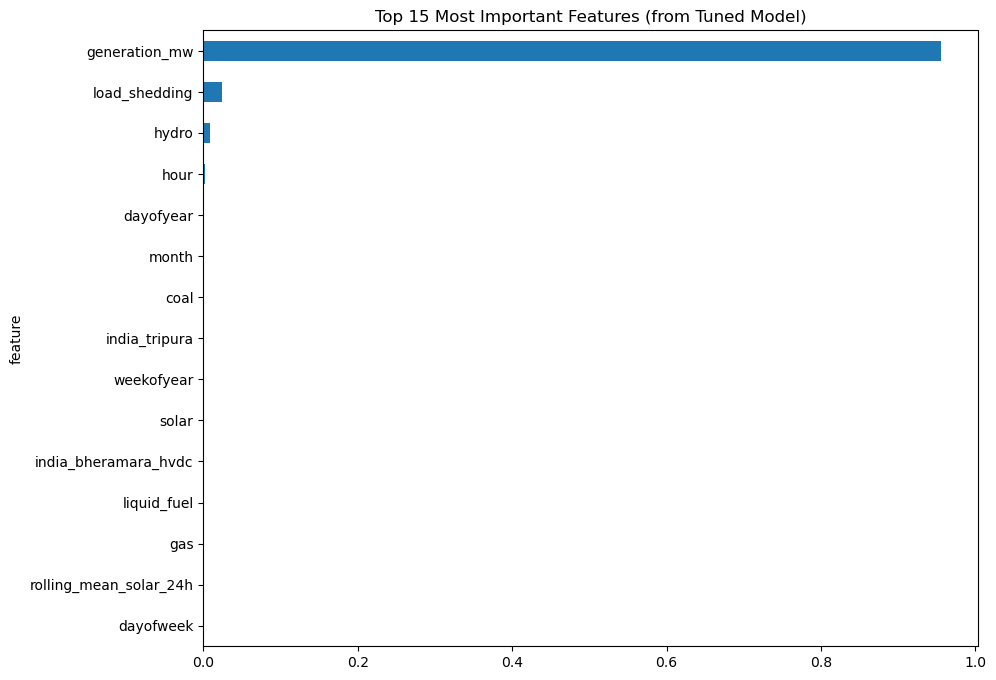

In [106]:
model_to_analyze = best_weighted_model

fi_df = pd.DataFrame({
    'feature': model_to_analyze.feature_names_in_,
    'importance': model_to_analyze.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 most important features:")
print(fi_df.head(15))

fi_df.head(15).sort_values('importance', ascending=True).plot(
    kind='barh',
    x='feature',
    y='importance',
    figsize=(10, 8),
    title='Top 15 Most Important Features (from Tuned Model)'
)
plt.legend().remove()
plt.show()

### Predict on Test Data and Visualize

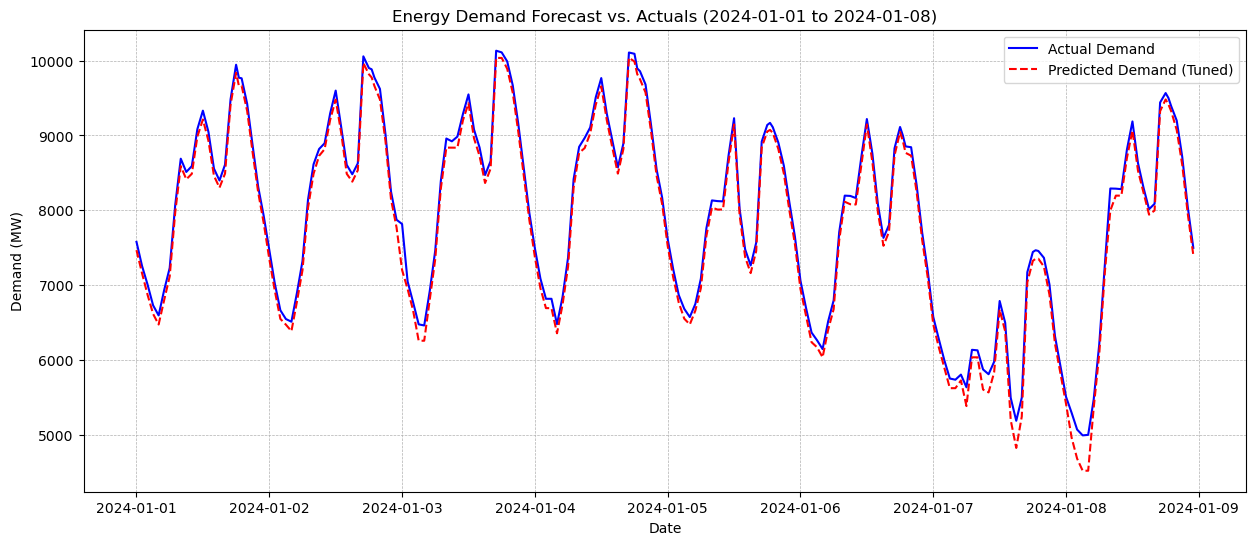

In [109]:
test = test.sort_index()

start_date = '2024-01-01'
end_date = '2024-01-08'
subset_df = test.loc[start_date:end_date]

plt.figure(figsize=(15, 6))
plt.plot(subset_df.index, subset_df['demand_mw'], label='Actual Demand', color='blue')
# Use the column name from the previous step
plt.plot(subset_df.index, subset_df['prediction_tuned'], label='Predicted Demand (Tuned)', color='red', linestyle='--')

plt.title(f'Energy Demand Forecast vs. Actuals ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


#### FINAL OBSERVATIONS
#### My model's predictions (the red line) are tracking the actual demand (the blue line) very closely, which shows that it is performing well overall.
#### I can see that my model has successfully learned the daily energy usage patterns, as it correctly predicts the peaks and troughs that happen each day.
#### I notice that the predictions are less accurate on January 7th and 8th, especially at the lowest points. This suggests my model finds it harder to predict demand on weekends compared to weekdays.

### Submission file (last 100 predictions)

In [116]:
test = test.sort_index()

last_100_predictions_df = test.tail(100).copy()

submission_df = last_100_predictions_df[['prediction_tuned']]

submission_df.rename(columns={'prediction_tuned': 'demand_mw'}, inplace=True)

submission_df.reset_index(inplace=True)
submission_df.rename(columns={'index': 'datetime'}, inplace=True)

submission_df.to_csv('submission.csv', index=False)

print("submission_last_100.csv created.")

submission_last_100.csv created.


In [117]:
submission_df.head()

,datetime,demand_mw
0,2025-06-13 13:00:00,13122.223633
1,2025-06-13 14:00:00,13405.925781
2,2025-06-13 15:00:00,13256.066406
3,2025-06-13 16:00:00,12910.972656
4,2025-06-13 17:00:00,12219.981445


In [119]:
submission_df.tail()

,datetime,demand_mw
95,2025-06-17 08:00:00,11928.281250
96,2025-06-17 09:00:00,12352.446289
97,2025-06-17 10:00:00,12506.362305
98,2025-06-17 11:00:00,12904.479492
99,2025-06-17 12:00:00,13255.250977
